## importing libraries......

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
import tensorflow

In [2]:
# ignore warnings....
warnings.filterwarnings("ignore")

# Eda

In [3]:
# getting the data....
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [4]:
# viewing the training data......
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [5]:
# data info 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
# data-types....
train_df.dtypes

seq_id                int64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object

In [7]:
# checking the test data...
test_df.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [8]:
# checking for null values....
train_df.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [9]:
# counting the length of protein_sequence....
train_df["sequence_length"] = train_df["protein_sequence"].apply(len)
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


In [10]:
# getting the min sequence protein 
train_df[train_df["sequence_length"] == min(train_df["sequence_length"])]

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
30277,30277,RPAVT,7.0,doi.org/10.1038/s41592-020-0801-4,50.4,5
30284,30284,RPGSI,7.0,doi.org/10.1038/s41592-020-0801-4,49.2,5


In [11]:
# getting the max sequence protein 
train_df[train_df["sequence_length"] == max(train_df["sequence_length"])]

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
28079,28079,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28080,28080,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28081,28081,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28082,28082,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28083,28083,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28084,28084,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28085,28085,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.3,NaN,25.0,32767


In [12]:
# getting the unique protein sequence...
train_df["protein_sequence"].unique()

array(['AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR',
       'AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS',
       'AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYATLGVAKNANGKDIKKAYYQLAKKYHPDTNKEDPDAGRKFQEVSEAYEVLSDEQKRREYDTYGQTAENIGRQGGGFPGGGAGGFGPEGFSQSWQFRSSIDPEELFRKIFGEGNFRTNSFDDFADSKFGFGQAQEMVMDLTFAQAARGVNKDVNVNVVDQCPKCAGTKCEPGTKPGRCQYCNGTGFETVSTGPFVMRSTCRYCQGTRQHIKYPCSECEGKGRTVQRRKVTVPVPAGIENGQTVRMQVGSKELFVTFRVERSDYFRREGADVHTDAAISLAQAVLGGTVRVQGVYEDQWI

In [13]:
# checking the data source...
train_df["data_source"].value_counts()

doi.org/10.1038/s41592-020-0801-4    24525
10.1021/acscatal.9b05223               211
10.1016/j.bpc.2006.10.014              185
10.7554/eLife.54639                    151
10.1007/s00253-018-8872-1               84
                                     ...  
10.1074/jbc.M001132200                   1
10.1021/bi9530090                        1
10.1016/j.ijbiomac.2008.12.016           1
10.1016/j.jmb.2004.02.073                1
10.1021/bi00219a037                      1
Name: data_source, Length: 324, dtype: int64

In [14]:
# checking the ph value....
train_df["pH"].value_counts()

7.00     26462
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
3.14         1
2.53         1
2.81         1
39.00        1
10.30        1
Name: pH, Length: 115, dtype: int64

In [15]:
np.mean(train_df["pH"])

6.892339248971194

In [16]:
# checking the target column....
train_df["tm"].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
98.1        1
97.6        1
92.7        1
1.2         1
103.0       1
Name: tm, Length: 770, dtype: int64

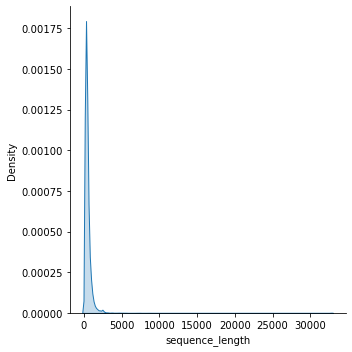

In [17]:
# plotting the length of protein.....
# plt.figure(figsize=(10,10))
sns.displot(data=train_df,x="sequence_length",
                 kind = 'kde', fill = True , palette = "viridis");

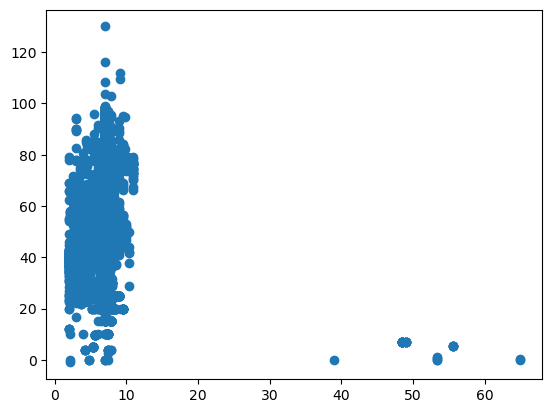

In [18]:
# correlation between ph and tm
plt.scatter(train_df["pH"],train_df["tm"]);

**Note:**
    As the value of pH cann't be greater than 14.


Refer to :
https://www.usgs.gov/media/images/ph-scale-0#:~:text=pHs%20of%20less%20than%207,free%20hydroxyl%20ions%20is%20basic.


So let's plot the pH value with 0-14.

<AxesSubplot:xlabel='pH', ylabel='tm'>

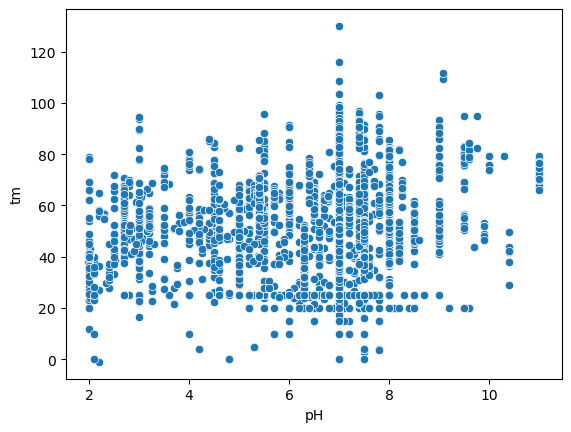

In [19]:
sns.scatterplot(train_df.query("pH <= 14.0")["pH"], train_df.tm)

In [20]:
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


In [21]:
# let's preprocess the protein sequence....
train_df  = train_df[train_df["sequence_length"]<=221]
train_df.reset_index(inplace=True)
sequences = [list(string) for string in train_df["protein_sequence"].values.tolist()]
seq_train = pd.DataFrame(sequences)
seq_train.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,A,A,F,Q,V,T,S,N,E,I,...,None,None,None,None,None,None,None,None,None,None
1,A,A,G,G,Q,P,Q,G,A,T,...,A,Q,Q,Q,C,N,None,None,None,None
2,A,A,I,G,I,G,I,L,G,G,...,None,None,None,None,None,None,None,None,None,None
3,A,A,K,S,G,D,A,E,E,A,...,None,None,None,None,None,None,None,None,None,None
4,A,A,L,A,L,G,L,P,A,F,...,None,None,None,None,None,None,None,None,None,None


In [22]:
# encode the sequences....

seq_train = seq_train.apply(LabelEncoder().fit_transform)
seq_train.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,4,13,17,16,15,11,3,7,...,20,20,19,20,20,20,20,20,20,18
1,0,0,5,5,13,12,13,5,0,16,...,0,13,13,13,1,11,20,20,20,18
2,0,0,7,5,7,5,7,9,5,5,...,20,20,19,20,20,20,20,20,20,18
3,0,0,8,15,5,2,0,3,3,0,...,20,20,19,20,20,20,20,20,20,18
4,0,0,9,0,9,5,9,12,0,4,...,20,20,19,20,20,20,20,20,20,18


In [23]:
train_df.columns

Index(['index', 'seq_id', 'protein_sequence', 'pH', 'data_source', 'tm',
       'sequence_length'],
      dtype='object')

In [24]:
# adding the few more columns....
seq_train[["pH","tm"]] = train_df[["pH","tm"]]

In [25]:
seq_train

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,pH,tm
0,0,0,4,13,17,16,15,11,3,7,...,19,20,20,20,20,20,20,18,7.0,49.7
1,0,0,5,5,13,12,13,5,0,16,...,13,13,1,11,20,20,20,18,7.0,45.1
2,0,0,7,5,7,5,7,9,5,5,...,19,20,20,20,20,20,20,18,7.0,62.8
3,0,0,8,15,5,2,0,3,3,0,...,19,20,20,20,20,20,20,18,7.0,36.3
4,0,0,9,0,9,5,9,12,0,4,...,19,20,20,20,20,20,20,18,7.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,19,16,0,19,13,5,9,13,0,14,...,19,20,20,20,20,20,20,18,7.0,87.1
9028,19,16,17,15,15,4,13,8,15,9,...,19,20,20,20,20,20,20,18,7.0,46.2
9029,19,17,0,3,13,4,5,18,16,17,...,19,20,20,20,20,20,20,18,7.0,51.0
9030,19,17,4,2,1,9,2,2,1,3,...,19,20,20,20,20,20,20,18,7.0,44.6


In [26]:
# checking for null values...
seq_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
pH     1
tm     0
Length: 223, dtype: int64

In [27]:
# filling up the null values...
seq_train["pH"] = seq_train["pH"].fillna(seq_train["pH"].median())

seq_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
pH     0
tm     0
Length: 223, dtype: int64

In [28]:
# splitting the data into train and test....
X_train,X_test, y_train,y_test = train_test_split(seq_train.drop("tm",axis=1),
                                                 seq_train["tm"],
                                                 test_size=0.1,
                                                 random_state=42)

# checking the length of the sets....
len(X_train),len(X_test),len(y_train),len(y_test)

(8128, 904, 8128, 904)

In [29]:
# let's make a evaluation function....
def calculate_results(y_true,y_pred):
    from scipy import stats

    results = stats.spearmanr(y_test, y_pred)
    return results

# Modelling....
we'll build a series of model and select the one that performs best....

    ~Random Forest Model
    ~Decision Tree Model
    ~Ridge Model
    ~XGBoost Model
    ~Dense Model

# Model 1 : Random Forest Model

In [30]:
# the model which we're going to build first is Random Forest Regressor
model_1 = RandomForestRegressor(n_estimators = 500,
                               )
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [31]:
# make prediction and get the results...
model_1_preds = model_1.predict(X_test)
model_1_preds

array([55.6516    , 54.105     , 53.81896   , 64.01582333, 55.31156667,
       38.10845   , 52.99546667, 61.08943   , 51.41427   , 54.35765286,
       52.14326667, 44.947     , 61.53928333, 51.87795   , 46.86414537,
       52.13643333, 27.5688    , 50.80108   , 50.53646667, 54.54779556,
       52.09528   , 55.83928   , 25.01      , 51.3576546 , 52.24028   ,
       72.9216    , 25.45660333, 53.924     , 73.434     , 53.95486667,
       55.67918   , 51.81528333, 55.81      , 53.37328333, 40.87064095,
       53.4788    , 55.37078857, 52.81313333, 54.45197778, 41.43429024,
       41.95868381, 51.5112    , 54.81180485, 25.028     , 49.29383   ,
       25.        , 59.54427667, 54.71196667, 52.69201333, 48.29791571,
       42.01767317, 53.32742   , 49.27      , 52.2664    , 51.63263333,
       53.3552    , 25.60526667, 54.351     , 44.88501667, 58.5455    ,
       54.52219333, 56.90323333, 55.43681   , 53.05997619, 54.07555   ,
       40.15494262, 55.86521905, 56.22907333, 27.76926667, 51.47

In [32]:
# getting the results...
model_1_results = calculate_results(y_test,model_1_preds)
model_1_results

SpearmanrResult(correlation=0.5142638496517553, pvalue=3.5415863564174125e-62)

# Model 2 : Decision Tree Model

In [33]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
# model_2 preds....
model_2_preds = model_2.predict(X_test)
model_2_preds

array([ 54.4       ,  47.5       ,  74.1       ,  66.8       ,
        43.4       ,  39.        ,  54.6       ,  61.6       ,
        59.6       ,  45.5       ,  47.9       ,  43.9       ,
        69.        ,  41.5       ,  46.74      ,  41.9       ,
        25.        ,  53.5       ,  43.5       ,  53.8       ,
        34.        ,  45.        ,  25.        ,  50.6       ,
        43.        ,  76.5       ,  25.        ,  91.8       ,
        76.5       ,  42.5       ,  59.6       ,  64.        ,
        58.        ,  80.53333333,  42.8       ,  53.3       ,
        37.8       ,  74.5       ,  51.3       ,  41.76666667,
        42.13333333,  55.7       ,  41.7       ,  25.        ,
        37.05      ,  25.        ,  61.3       ,  53.1       ,
        47.5       ,  47.9       ,  44.4       ,  46.6       ,
        46.9       ,  51.3       ,  84.4       ,  37.8       ,
        25.        ,  65.6       ,  49.5       ,  74.2       ,
        52.        ,  65.3       ,  39.6       ,  53.4 

In [35]:
# model 2 results....
model_2_results = calculate_results(y_test,model_2_preds)
model_2_results

SpearmanrResult(correlation=0.3985451280418749, pvalue=8.747818637407602e-36)

# Model 3 : Ridge

In [36]:
# let's build the Ridge model from sklearn linear model...
model_3 = Ridge()
model_3.fit(X_train,y_train)

Ridge()

In [37]:
# predictions....
model_3_preds = model_3.predict(X_test)
model_3_preds

array([59.49428324, 48.14883227, 54.48183564, 47.14286484, 54.23546211,
       44.64319411, 51.22423037, 41.70902748, 50.14157871, 51.89692838,
       51.78617383, 43.08460625, 43.93487739, 54.08114738, 44.82441216,
       40.91183818, 38.40909464, 49.27668194, 48.71413214, 44.69786574,
       41.65540459, 52.09652143, 42.83944307, 58.12314822, 54.42664993,
       63.07835813, 39.33124097, 45.9866605 , 58.93699034, 54.65505579,
       49.27497   , 44.85986757, 46.38362401, 50.14441683, 48.98331821,
       49.76282267, 50.9753778 , 41.44195084, 51.84572283, 46.55680604,
       46.77619417, 51.55214813, 55.56829369, 32.53042202, 49.66150935,
       47.92474898, 57.29026343, 51.1967472 , 48.61696394, 49.60057469,
       44.18696042, 38.73150473, 50.04666936, 41.81822258, 63.87658503,
       46.60283069, 30.24620573, 61.33508934, 58.05996764, 45.74079043,
       59.84093701, 52.02608482, 55.20179411, 46.59370697, 54.24550499,
       50.45913886, 48.56322722, 55.86639418, 48.39686557, 49.56

In [38]:
# calculate results...
model_3_results = calculate_results(y_test,model_3_preds)
model_3_results

SpearmanrResult(correlation=0.2999084131096811, pvalue=3.0338164448233865e-20)

# Model 4 : XGBoost

In [39]:
# let's build the XGBoost Regressor....
model_4 = XGBRegressor(n_estimators=500, max_depth=15)
model_4.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [40]:
# getting prediction...
model_4_preds = model_4.predict(X_test)
model_4_preds

array([ 5.4517174e+01,  5.1712288e+01,  5.5918892e+01,  5.8232983e+01,
        5.7978561e+01,  3.2039139e+01,  4.9056751e+01,  6.1600300e+01,
        4.7553272e+01,  5.8689236e+01,  4.9929642e+01,  4.5329235e+01,
        6.8999695e+01,  5.6509003e+01,  4.6738338e+01,  5.1640331e+01,
        2.6495455e+01,  4.6000336e+01,  4.1913315e+01,  5.1987984e+01,
        4.8551449e+01,  5.5182755e+01,  2.4587320e+01,  5.0598854e+01,
        5.8971561e+01,  7.6538490e+01,  2.5032589e+01,  5.0043774e+01,
        7.6086227e+01,  5.6087639e+01,  5.3112915e+01,  4.6146950e+01,
        5.7994743e+01,  5.8447639e+01,  4.2769348e+01,  5.9727581e+01,
        4.7829456e+01,  5.7814423e+01,  5.2591160e+01,  4.1768311e+01,
        4.2134533e+01,  5.9868114e+01,  5.5843777e+01,  2.4997334e+01,
        4.5934280e+01,  2.5001978e+01,  6.1291531e+01,  5.7046795e+01,
        5.6735626e+01,  4.7886166e+01,  4.4136333e+01,  5.2046528e+01,
        5.1152588e+01,  6.1521225e+01,  5.4365063e+01,  4.8479660e+01,
      

In [41]:
# model_4_results...
model_4_results = calculate_results(y_test,model_4_preds)
model_4_results

SpearmanrResult(correlation=0.4682529148880313, pvalue=1.8717294933637219e-50)

# Model 5 : Dense Model

In [91]:
# let's build the simple neural network....
model_5 = Sequential(name="Dense_model")
model_5.add(layers.Dense(256,activation="relu",))

# adding hidden layers...
model_5.add(layers.Dense(128,activation="relu"))
model_5.add(layers.Dense(128,activation="relu"))

model_5.add(layers.Dense(128,activation="relu"))
model_5.add(layers.Dense(128,activation="relu"))
model_5.add(layers.Dense(128,activation="relu"))

model_5.add(layers.Dense(64,activation="relu"))
model_5.add(layers.Dense(32,activation="relu"))

# output layer...
model_5.add(layers.Dense(1,activation='linear'))

In [92]:
# compiling the model
model_5.compile(loss=tensorflow.keras.losses.MeanSquaredError(),
                metrics=['mean_squared_error'],
               optimizer=tensorflow.keras.optimizers.Adam())

In [93]:
history_5 = model_5.fit(X_train,y_train,
                       epochs=100,
                       validation_data = (X_test,y_test),)

Epoch 1/100
  9/254 [>.............................] - ETA: 1s - loss: 1065.0527 - mean_squared_error: 1065.0527  

2022-09-27 21:32:59.843361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


254/254 [==============================] - 2s 7ms/step - loss: 320.2812 - mean_squared_error: 320.2812 - val_loss: 407.8307 - val_mean_squared_error: 407.8307
Epoch 2/100
  8/254 [..............................] - ETA: 1s - loss: 275.4154 - mean_squared_error: 275.4154

2022-09-27 21:33:01.533808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


254/254 [==============================] - 2s 6ms/step - loss: 266.0929 - mean_squared_error: 266.0929 - val_loss: 321.5644 - val_mean_squared_error: 321.5644
Epoch 3/100
254/254 [==============================] - 2s 6ms/step - loss: 244.0405 - mean_squared_error: 244.0405 - val_loss: 241.8220 - val_mean_squared_error: 241.8220
Epoch 4/100
254/254 [==============================] - 2s 6ms/step - loss: 235.8247 - mean_squared_error: 235.8247 - val_loss: 248.1694 - val_mean_squared_error: 248.1694
Epoch 5/100
254/254 [==============================] - 2s 6ms/step - loss: 242.6337 - mean_squared_error: 242.6337 - val_loss: 280.5229 - val_mean_squared_error: 280.5229
Epoch 6/100
254/254 [==============================] - 2s 6ms/step - loss: 231.9890 - mean_squared_error: 231.9890 - val_loss: 242.7043 - val_mean_squared_error: 242.7043
Epoch 7/100
254/254 [==============================] - 2s 6ms/step - loss: 225.7052 - mean_squared_error: 225.7052 - val_loss: 269.0047 - val_mean_squared_er

Epoch 50/100
254/254 [==============================] - 2s 6ms/step - loss: 122.3166 - mean_squared_error: 122.3166 - val_loss: 211.6862 - val_mean_squared_error: 211.6862
Epoch 51/100
254/254 [==============================] - 2s 6ms/step - loss: 122.2277 - mean_squared_error: 122.2277 - val_loss: 214.3304 - val_mean_squared_error: 214.3304
Epoch 52/100
254/254 [==============================] - 2s 6ms/step - loss: 118.1242 - mean_squared_error: 118.1242 - val_loss: 213.0495 - val_mean_squared_error: 213.0495
Epoch 53/100
254/254 [==============================] - 2s 6ms/step - loss: 119.4843 - mean_squared_error: 119.4843 - val_loss: 216.6472 - val_mean_squared_error: 216.6472
Epoch 54/100
254/254 [==============================] - 2s 6ms/step - loss: 123.7064 - mean_squared_error: 123.7064 - val_loss: 219.1106 - val_mean_squared_error: 219.1106
Epoch 55/100
254/254 [==============================] - 2s 6ms/step - loss: 118.9685 - mean_squared_error: 118.9685 - val_loss: 221.1083 - v

Epoch 98/100
254/254 [==============================] - 2s 6ms/step - loss: 92.3626 - mean_squared_error: 92.3626 - val_loss: 223.2089 - val_mean_squared_error: 223.2089
Epoch 99/100
254/254 [==============================] - 2s 6ms/step - loss: 99.9517 - mean_squared_error: 99.9517 - val_loss: 208.9892 - val_mean_squared_error: 208.9892
Epoch 100/100
254/254 [==============================] - 2s 6ms/step - loss: 98.9603 - mean_squared_error: 98.9603 - val_loss: 224.9163 - val_mean_squared_error: 224.9163


In [94]:
# make prediction...
model_5_pred = model_5.predict(X_test)
model_5_pred

29/29 [==============================] - 0s 3ms/step


2022-09-27 21:35:51.272893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[49.79071  ],
       [49.482655 ],
       [53.29865  ],
       [48.643417 ],
       [38.050037 ],
       [40.60896  ],
       [51.544483 ],
       [59.141006 ],
       [40.750862 ],
       [40.43111  ],
       [56.730312 ],
       [48.40977  ],
       [53.99399  ],
       [47.68905  ],
       [42.937134 ],
       [50.326675 ],
       [37.142292 ],
       [49.161034 ],
       [48.215652 ],
       [40.628628 ],
       [45.879974 ],
       [50.65486  ],
       [29.407486 ],
       [57.465168 ],
       [46.60925  ],
       [72.87901  ],
       [27.466322 ],
       [49.323982 ],
       [75.862274 ],
       [53.794273 ],
       [50.504807 ],
       [43.782284 ],
       [33.95549  ],
       [53.18494  ],
       [36.933926 ],
       [40.88668  ],
       [43.80789  ],
       [51.892998 ],
       [75.43223  ],
       [45.548004 ],
       [45.926365 ],
       [69.96062  ],
       [55.95679  ],
       [29.68834  ],
       [37.355103 ],
       [35.93029  ],
       [60.62937  ],
       [51.83

In [95]:
# calculate results...
model_5_results = calculate_results(y_test,model_5_pred)
model_5_results

SpearmanrResult(correlation=0.42623928412696105, pvalue=3.317343168457562e-41)

so far Random Forest Regressor model has performs better than any other model. So, we'll select the Random Forest Model and apply some tunning in order to improve it's score.

# Fine Tunning : Random Forest Regressor

In [98]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
# apply the randomized search tunning
random_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions = random_grid, 
                                  n_iter = 100, cv = 3, 
                                  verbose=2, random_state=42, n_jobs = -1)

In [100]:
# fit to data...
random_model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  23.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  17.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  28.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 9.0min


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  23.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  18.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  27.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 9.5min


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  17.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  27.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 9.7min


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  19.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=15.3min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  24.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  22.6s


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=15.4min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 5.2min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 3.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  55.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  54.6s


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   8.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=14.4min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 4.8min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 3.2min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 3.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  56.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  56.1s


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.8min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  29.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=14.2min
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  24.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  51.6s


/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWar

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  20.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  17.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  18.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  19.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 7.5min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 7.6min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  22.9s
[CV] END bootstrap=False, max_depth=11

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   7.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  19.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  18.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  18.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  19.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 7.8min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.8min
[CV] END bootstrap=False, max_depth=90, 

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 4.4min
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.6min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  10.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  33.1s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  19.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=17.3min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  46.7s
[CV] END bootstrap=True, max_dep

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWar

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  51.2s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=18.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 4.4min
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  11.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  11.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  40.3s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.9s
[CV] END bootstrap=True, max_depth=90,

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  38.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  22.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  22.5s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 5.2min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=14.8min
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=18.7min
[CV] END bootstrap=True, max_de

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWar

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=10.8min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=18.1min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 3.4min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 7.5min
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  15.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 1.1min
[CV] END bootstrap=True, 

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWar

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=15.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  20.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  21.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=20.1min
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.7s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=10.5min
[CV] END bootstrap=False, max_dept

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWar

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  58.4s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  25.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time= 9.2min
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=19.9min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=15.7min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  45.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  18.3s
[CV] END bootstrap=False, max_

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [101]:
random_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [106]:
model_6_fine_tune = RandomForestRegressor(n_estimators= 1000, min_samples_split = 5, min_samples_leaf = 4,
 max_features = 'auto', max_depth = 100, bootstrap = True)
# fitting to data...
model_6_fine_tune.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000)